# Project: Star Wars Survey

In [1]:
# Importing libraries used throughout this lession
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for display more than one pandas df at once
# from IPython.display import display 
# import re # for regular expressions
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt
# import re 

## Project Overview
---

While waiting for Star Wars: The Force Awakens to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

This is a simple project of exploring and cleaning the survey data.


The data has several columns, including the following:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a `Yes` or `No` response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## 1. Reading and Initial Exploration of Data
---

In [2]:
# reading the dataset as a pandas dataframe
star_wars = pd.read_csv("data/star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


---
**Observations from above graph**

Some of the column names are either too long and overly descriptive or undescriptive.

---

## 2. Cleaning and Mapping Yes/No Columns
---

The columns of interest here are: 

 - `Have you seen any of the 6 films in the Star Wars franchise?`
 - `Do you consider yourself to be a fan of the Star Wars film franchise?`
 
The task here is to convert the Yes/No columns into boolean True/False as this can be used for indexing.

In [3]:
# yes/no dictionary for mapping changes 
yes_no = {
    "Yes": True,
    "No": False
}

# mapping changes to the columns of interest using the series.map() method
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = (
    star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = (
    star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
)

In [4]:
# checking the changes have taken affect via a freq table
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64

## 3. Cleaning and Mapping Checkbox Columns
---

The next six columns represent a single checkbox question. The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace.`
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi.`



In [6]:
# pandas series index (list) of columns of interest
movie_cols = star_wars.columns[3:9]
movie_cols

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [7]:
# creating a list of the unique entries in the columns of interest
unique_movies = np.concatenate([star_wars[column].dropna().unique() 
                                for column in star_wars.columns[3:9]])

In [8]:
unique_movies

array(['Star Wars: Episode I  The Phantom Menace',
       'Star Wars: Episode II  Attack of the Clones',
       'Star Wars: Episode III  Revenge of the Sith',
       'Star Wars: Episode IV  A New Hope',
       'Star Wars: Episode V The Empire Strikes Back',
       'Star Wars: Episode VI Return of the Jedi'], dtype=object)

In [9]:
# change the elements in movie_cols to True or False
for col, movie in zip(movie_cols, unique_movies):
    
    # mapping dict for element changes
    movie_map = {
        movie: True,
        np.NaN: False
    }
    # mapping the changes
    star_wars[col] = star_wars[col].map(movie_map)   

In [10]:
# Counting unique values in each column
unique_elements = star_wars[movie_cols].apply(lambda x: x.unique())
unique_elements

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False


In [11]:
# changing column names
# mapping dict 
movie_col_names = {}
# new column name to movie name dictionary
movie_names_map = {}
# movie list
movie_list = []
# movie number
movie_num = 1

# Creating a mapping dictionary for change movie column names
for col, movie in zip(movie_cols, unique_movies):
    new_col_name = f'seen_{movie_num}'
    movie_col_names[col] = new_col_name
    movie_names_map[new_col_name] = movie
    movie_list.append(movie)
    movie_num += 1

movie_col_names

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [12]:
# this a dictionary to map the moive column names back to the movie name
movie_names_map

{'seen_1': 'Star Wars: Episode I  The Phantom Menace',
 'seen_2': 'Star Wars: Episode II  Attack of the Clones',
 'seen_3': 'Star Wars: Episode III  Revenge of the Sith',
 'seen_4': 'Star Wars: Episode IV  A New Hope',
 'seen_5': 'Star Wars: Episode V The Empire Strikes Back',
 'seen_6': 'Star Wars: Episode VI Return of the Jedi'}

In [13]:
# changing movie column names and checking result
star_wars = star_wars.rename(columns=movie_col_names)
star_wars.head(0)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


## 4. Cleaning the Ranking Columns
---

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

In [14]:
# Counting unique values in each column
ranking_cols = star_wars.columns[9:15]
unique_rank = star_wars[ranking_cols].apply(lambda x: x.unique())
unique_rank

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,6.0,3.0,2.0,4.0,3.0
3,5.0,4.0,6.0,6.0,1.0,2.0
4,6.0,5.0,4.0,3.0,2.0,1.0
5,4.0,1.0,5.0,1.0,3.0,4.0
6,2.0,3.0,2.0,5.0,6.0,5.0


---
**Observations from above graph**

The values in the columns of interest are already floats so no need to convert them; however, below is how this conversion could be achieved

---

In [15]:
# converting columns to floats as the above shows that there are only numerical values
star_wars[ranking_cols] = star_wars[ranking_cols].astype(float)
unique_rank = star_wars[ranking_cols].apply(lambda x: x.unique())
unique_rank

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,6.0,3.0,2.0,4.0,3.0
3,5.0,4.0,6.0,6.0,1.0,2.0
4,6.0,5.0,4.0,3.0,2.0,1.0
5,4.0,1.0,5.0,1.0,3.0,4.0
6,2.0,3.0,2.0,5.0,6.0,5.0


In [16]:
# changing column names

# mapping dict 
rank_col_map = {}
# movie number
rank_num = 1
# list of new rank names
new_ranking_col = []

# Creating a mapping dictionary for change movie column names
for col in ranking_cols:
    # creating new rank column name
    new_col_name = f'ranking_{rank_num}'
    
    # appending to mapping dictionary
    rank_col_map[col] = new_col_name
    
    # appending new name to list of new names for indexing
    new_ranking_col.append(new_col_name)
    
    # incrementing 
    rank_num += 1

# changing movie column names and checking result
star_wars = star_wars.rename(columns=rank_col_map)
star_wars[new_ranking_col].head(0)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6


## 5. Finding the Highest-Ranked Movie
---

In [17]:
# calculating the mean of each rank column
mean_rank = star_wars[new_ranking_col].mean()
mean_rank

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

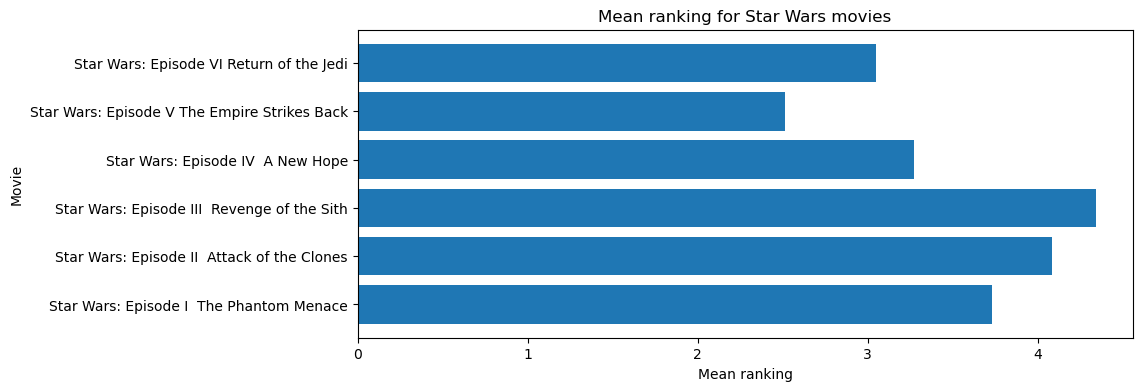

In [18]:
plt.figure(figsize=(10, 4))
plt.barh(movie_list, mean_rank)
plt.xlabel('Mean ranking')
plt.ylabel('Movie')
plt.title('Mean ranking for Star Wars movies')
plt.show()

---
**Observations from above graph**

The Episode III: Revenge of the Sith - Episode 3 (2005) with the highest average rank may indicate the follow:
 - The age of the participants who took the survey aligned with the release of this film
 - The movie ranked in the middle of most responses to the survey
 - The film was seen either lots or not that much when compared to the other movies

---

## 6. Finding the Most Viewed Movie
---

In [19]:
# calculating the mean of each rank column
most_seem = star_wars[movie_names_map.keys()].sum()
most_seem

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

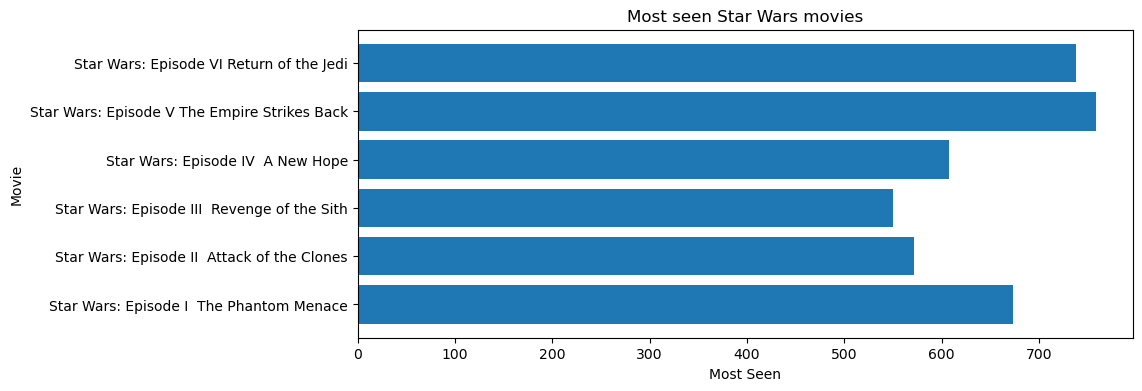

In [20]:
plt.figure(figsize=(10, 4))
plt.barh(movie_list, most_seem)
plt.xlabel('Most Seen')
plt.ylabel('Movie')
plt.title('Most seen Star Wars movies')
plt.show()

---
**Observations from above graph**

The Episode III: Revenge of the Sith - Episode 3 (2005) with the highest average rank may was seen the least!

---

## 7. Exploring the Data by Binary Segments
---

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` — `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` — `Yes` or `No`
- `Gender` — `Male` or `Female`

In [21]:
# splitting the data by fan and not_fan
fan_col_name = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
fan = star_wars[star_wars[fan_col_name] == True]
not_fan = star_wars[star_wars[fan_col_name] == False]

print('Number of fans: ', len(fan))
print('Number of non-fans: ', len(not_fan))

Number of fans:  552
Number of non-fans:  284


### 7.1 Comparing the Average Movie Ranking of Fans and Not Fans

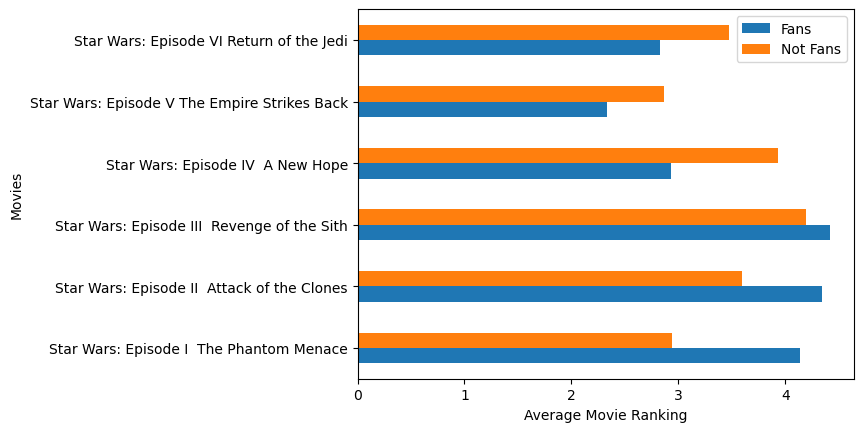

In [22]:
# Create a Pandas DataFrame with two sets of data
data = {
    'Fans': fan[new_ranking_col].mean().tolist(),
    'Not Fans': not_fan[new_ranking_col].mean().tolist(),
    'Movies': movie_list
}

df_fans_mean = pd.DataFrame(data)

# Set the index to be the labels column
df_fans_mean.set_index('Movies', inplace=True)

# Plot the data
ax = df_fans_mean.plot(kind='barh')

# Set the legend and axis labels
ax.legend(['Fans', 'Not Fans'])
ax.set_xlabel('Average Movie Ranking')
ax.set_ylabel('Movies')

# Show the plot
plt.show()


### 7.2 Comparing the Most Seen Movie of Fans and Not Fans

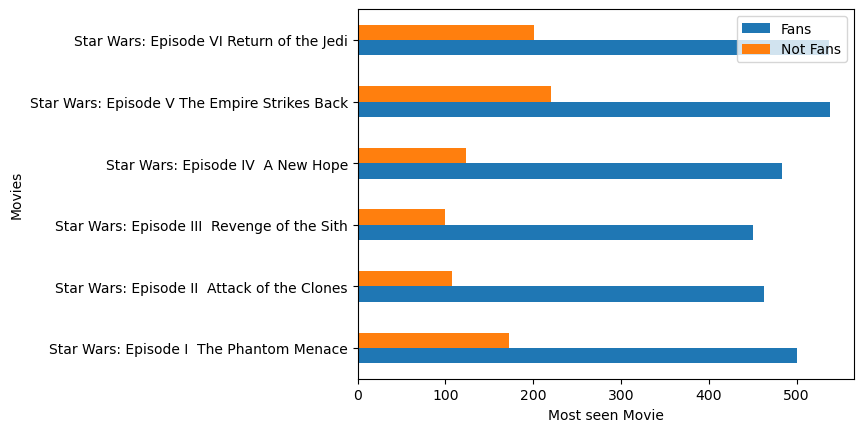

In [23]:
# Create a Pandas DataFrame with two sets of data
data = {
    'Fans': fan[movie_names_map.keys()].sum().tolist(),
    'Not Fans': not_fan[movie_names_map.keys()].sum().tolist(),
    'Movies': movie_list
}
df_fans_mean = pd.DataFrame(data)

# Set the index to be the labels column
df_fans_mean.set_index('Movies', inplace=True)

# Plot the data
ax = df_fans_mean.plot(kind='barh')

# Set the legend and axis labels
ax.legend(['Fans', 'Not Fans'])
ax.set_xlabel('Most seen Movie')
ax.set_ylabel('Movies')

# Show the plot
plt.show()


---
**Observations from above graph**

- The fans on average ranked `The Episode III: Revenge of the Sith - Episode 3 (2005)` higher than not fans
- The fans ranked the episodes 1,2, and higher than non-fans and the non-fans rank the first trilogy, episodes 4, 5, and 6 higher than the fans on average
- The trends for average ranker are similar for each movie when comparing the fans and non-fans
- Fans watch a lot more of the movies than non-fans; however, it the number there was about twice the number of fans took the survey than non-fans

- `Number of fans:  552`
- `Number of non-fans:  284`




**Movie List**
1. Episode IV: A New Hope - Episode 4 (1977)
2. Episode V: The Empire Strikes Back - Episode 5 (1980)
3. Episode VI: Return of the Jedi - Episode 6 (1983)
4. Episode I: The Phantom Menace - Episode 1 (1999)
5. Episode II: Attack of the Clones - Episode 2 (2002)
6. Episode III: Revenge of the Sith - Episode 3 (2005)

These not in survey:
7. Episode VII: The Force Awakens - Episode 7 (2015)
8. Episode VIII: The Last Jedi - Episode 8 (2017)
9. Episode IX: The Rise of Skywalker - Episode 9 (2019)

---